3.1415927


interp radius in USFFT: 3


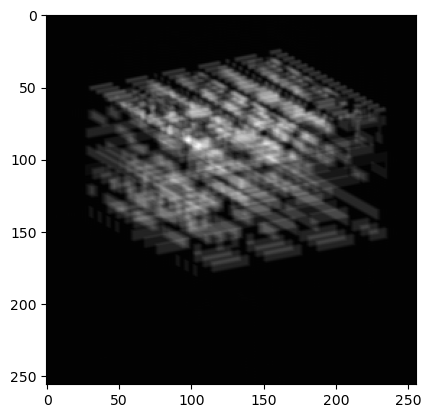

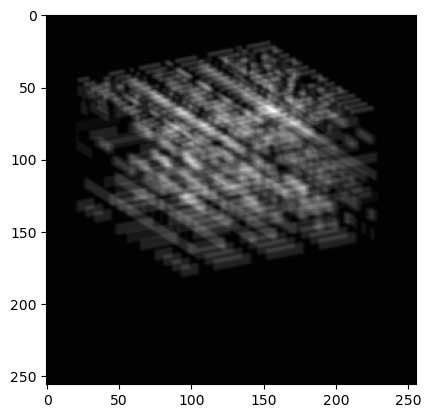

In [17]:
import numpy as np
import lamcg as lcg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import dxchange
import time
n0 = 256
n1 = 256
n2 = 256
detw = 256
deth = 256
ntheta = 180
phi = np.pi/2-20/180*np.pi
alpha = 1/180*np.pi
center = [4,0] # offseet from the middle in y and x
theta = np.linspace(0,2*np.pi,ntheta,endpoint=False).astype('float32')
f = np.ones([n0,n1,n2]).astype('complex64')
f[:]=-dxchange.read_tiff(f'delta-chip-{n0}.tiff')#64:-64,64:-64,64:-64]
f[f<0.8e-5]=0

with lcg.SolverLam(n0, n1, n2, detw, deth, ntheta, phi,alpha,center,1e-2) as slv:
    g = slv.fwd_lam(f,theta)
print(theta[ntheta//2])
import matplotlib.pyplot as plt
plt.imshow(g.real[ntheta//6],cmap='gray')
plt.show()
plt.imshow(g.real[ntheta//6+ntheta//2],cmap='gray')
plt.show()


In [19]:


with lcg.SolverLam(n0, n1, n2, detw, deth, ntheta, phi+1/180*np.pi,0.0,[0,0],1e-2) as slv:
    rec = slv.cg_lam(g, f*0, theta+0.2, 128, False)

interp radius in USFFT: 3


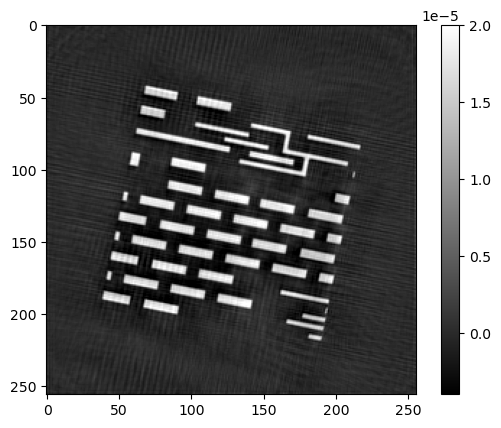

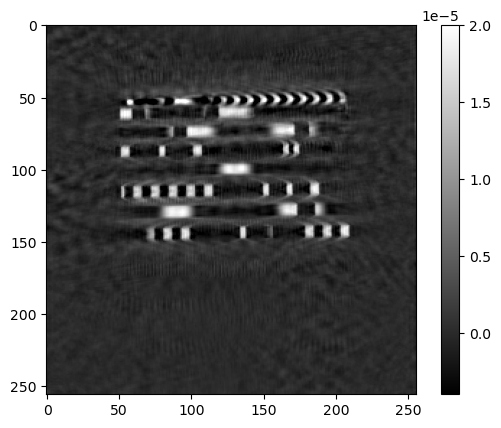

In [20]:
plt.imshow(rec.real[73],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()
plt.imshow(rec.real[:,n0//2],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()

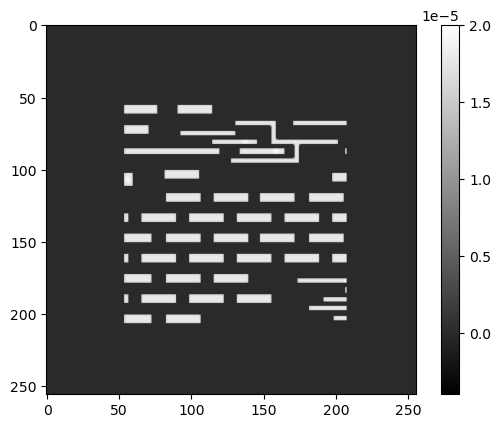

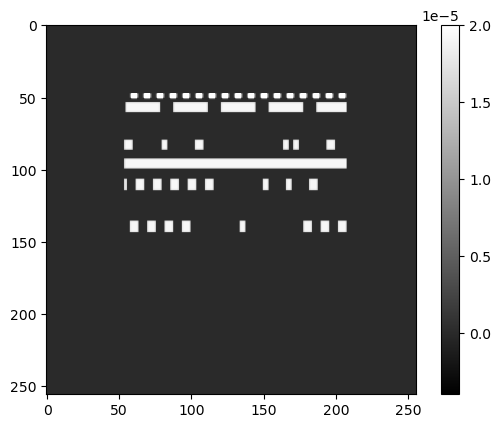

In [60]:
plt.imshow(f.real[73],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()
plt.imshow(f.real[:,n0//2],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()

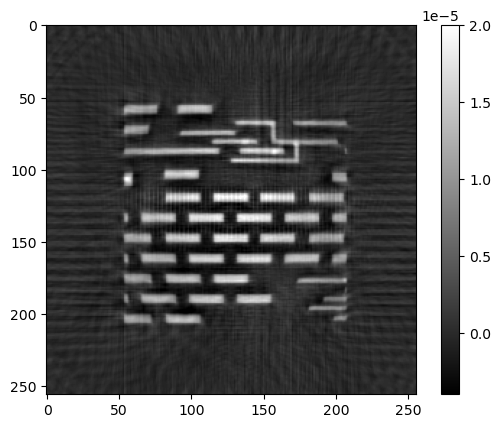

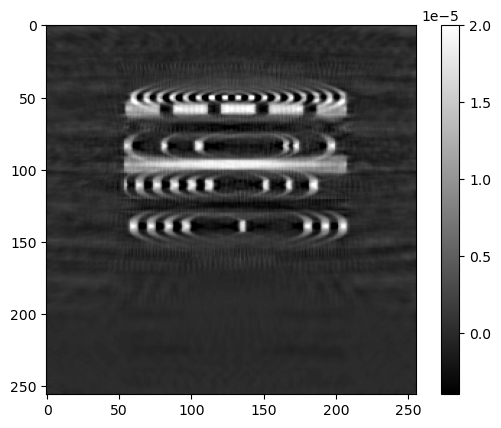